In [1]:
import random
import timeit
import time

In [2]:
def create_sequence_of_interest(length_of_seq):
    """
    create a sequence of given length containing integer values, either 0 or 1

    this is intended to represent the outcome of a sequence of coin flips
    """
    list_of_flips=[]
    for this_flip in range(length_of_seq):
        list_of_flips.append(random.randint(0, 1))
    return list_of_flips



In [3]:
# create_sequence_of_interest(10)

In [4]:
def find_match(sequence_of_interest):
    """
    given a sequence of integers (either 1 or 2), flip a coin until that sequence is found
    """
    interested_seq = list(sequence_of_interest)
    seq = []
    while True:
        if len(interested_seq) == 0:
            # print(seq)
            break

        flip_result = random.choice([0,1])
        seq.append(flip_result)

        if interested_seq[0] == flip_result:
            interested_seq.pop(0)
        else:
            interested_seq = list(sequence_of_interest)

    #print("number of coin flips:",number_of_coin_flips)
#     elapsed = timeit.default_timer() - start_time
    #print(str(elapsed) + " seconds")
#     return elapsed, number_of_coin_flips

    return seq
    

In [5]:
number_of_tries_per_loop=1000
start_length=3
end_length=10

In [6]:
list_of_result_dicts=[] 

main_start_time = timeit.default_timer()
for length_of_seq in range(3,10):
    for this_try in range(number_of_tries_per_loop):
        start_time = timeit.default_timer()
        
        sequence_of_interest = create_sequence_of_interest(length_of_seq)
        # print(sequence_of_interest)
        
        seq = find_match(sequence_of_interest)
        
        elapsed = timeit.default_timer() - start_time
        
        number_of_coin_flips = len(seq)
        # print(elapsed,"seconds")
        # print(number_of_coin_flips)
        this_result={}
        this_result['elapsed time in seconds'] = elapsed
        this_result['number of flips'] = number_of_coin_flips
        this_result['sequence length'] = length_of_seq
        list_of_result_dicts.append(this_result)
        
print('elapsed:',time.time()-main_start_time,'seconds')

elapsed: 1615420678.5602636 seconds


In [7]:
import pandas
pandas.__version__

'0.25.1'

In [8]:
results_df = pandas.DataFrame(list_of_result_dicts)
results_df.head(10)

,elapsed time in seconds,number of flips,sequence length
0,0.000040,7,3
1,0.000014,6,3
2,0.000013,5,3
3,0.000008,3,3
4,0.000036,24,3
5,0.000071,29,3
6,0.000026,13,3
7,0.000023,12,3
8,0.000024,15,3
9,0.000021,13,3


In [9]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.1.1'

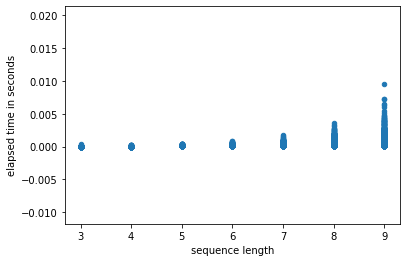

In [10]:
results_df.plot.scatter(x='sequence length',y='elapsed time in seconds')
plt.show()

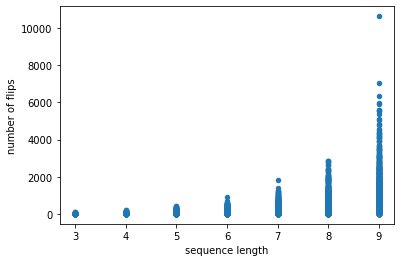

In [11]:
results_df.plot.scatter(x='sequence length',y='number of flips')
plt.show()

In [12]:
results_df.groupby('sequence length').describe()

elapsed time in seconds                                \
                                  count      mean       std       min   
sequence length                                                         
3                                1000.0  0.000023  0.000021  0.000007   
4                                1000.0  0.000038  0.000031  0.000008   
5                                1000.0  0.000067  0.000062  0.000010   
6                                1000.0  0.000126  0.000115  0.000012   
7                                1000.0  0.000235  0.000220  0.000014   
8                                1000.0  0.000505  0.000497  0.000017   
9                                1000.0  0.000996  0.001025  0.000018   

                                                        number of flips  \
                      25%       50%       75%       max           count   
sequence length                                                           
3                0.000011  0.000017  0.000028  0.000341          1000.0   
4                0.000017  0.000028  0.000048  0.000206          1000.0   
5                0.000024  0.000048  0.000085  0.000402          1000.0   
6                0.000046  0.000088  0.000166  0.000868          1000.0   
7                0.000080  0.000164  0.000316  0.001831          1000.0   
8                0.000165  0.000354  0.000675  0.003593          1000.0   
9                0.000299  0.000669  0.001374  0.009600          1000.0   

                                                                              
                     mean          std  min     25%    50%      75%      max  
sequence length                                                               
3                  13.987    12.847486  3.0    5.00   10.0    18.00    105.0  
4                  30.696    28.383926  4.0   10.75   21.0    42.00    208.0  
5                  60.719    60.418328  5.0   20.00   43.0    79.00    444.0  
6                 126.356   118.081143  6.0   43.00   88.0   170.25    919.0  
7                 244.496   225.653193  7.0   78.00  175.5   340.00   1827.0  
8                 511.511   490.751827  8.0  166.75  363.5   686.75   2863.0  
9                1044.140  1064.065994  9.0  306.75  719.0  1442.25  10642.0

We can add error bars to the plot for each sequence length

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html

https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html

https://matplotlib.org/gallery/statistics/errorbar_features.html

or use a violin plot

In [13]:
import seaborn
seaborn.__version__

'0.9.0'

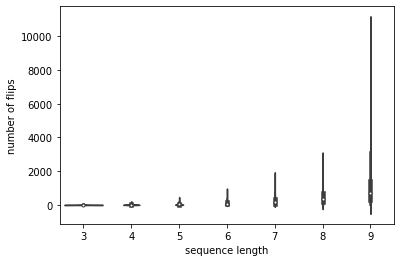

In [14]:
ax = seaborn.violinplot(x="sequence length", 
                        y="number of flips", 
                        data=results_df,
                        showmeans=True,
                        showextrema=True,
                        showmedians=True)